Challenge:  Build a "comparator" for NBA players. That is build a classifier that takes in a players stats and position allows the users to find a historical comparison. The classifier should allow you to take in either predict the best position for the player given stats, or given cumlative stats and or position predict the historical comparison.  Finally build a model that takes in year on year stats and makes a projection of future stats 3 to 5 years.

Challenge #1 build a KNN classifier that given stats predicts the position of the player

In [553]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [554]:
nba_path = '../../dataset/NBA_players_2015.csv'
nba = pd.read_csv(nba_path)

In [555]:
nba.columns

Index(['Unnamed: 0', 'season_end', 'player', 'pos', 'age', 'bref_team_id', 'g',
       'gs', 'mp', 'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa',
       'x2p_', 'ft', 'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [556]:
nba.head()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [557]:
nba.tail()

,Unnamed: 0,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
473,473,2015,James Young,G,19,BOS,27,0,10.9,1.1,...,3.9,15.3,0.1,0.2,0.2,0.040,-1.9,-2.2,-4.1,-0.2
474,474,2015,Nick Young,G,29,LAL,42,0,23.8,4.1,...,7.5,26.0,1.1,0.1,1.2,0.059,1.0,-4.2,-3.2,-0.3
475,475,2015,Thaddeus Young,F,26,TOT,58,50,31.8,5.9,...,9.7,21.3,1.4,1.1,2.4,0.064,0.4,-0.1,0.3,1.1
476,476,2015,Cody Zeller,C,22,CHO,61,44,24.1,2.8,...,12.3,15.6,1.7,2.2,3.9,0.129,-1.9,2.5,0.7,1.0
477,477,2015,Tyler Zeller,C,25,BOS,62,39,20.8,3.9,...,10.5,19.1,3.2,1.3,4.5,0.167,0.2,0.4,0.7,0.9


In [558]:
nba.drop(columns=['Unnamed: 0', 'bref_team_id'], inplace=True)

In [559]:
nba.head(1)

,season_end,player,pos,age,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,52,21,19.2,2.2,4.6,0.469,...,15.1,14.7,0.6,0.5,1.0,0.05,-2.6,-0.7,-3.4,-0.3


In [560]:
nba.describe(include='all')

,season_end,player,pos,age,g,gs,mp,fg,fga,fg_,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,478.0,478,478,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
unique,NaN,478,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Shabazz Napier,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.0,NaN,NaN,26.573222,42.104603,19.874477,20.045607,3.018201,6.847699,0.429230,...,13.424268,18.915272,1.055858,0.971339,2.027197,0.073575,-1.396862,-0.495816,-1.892678,0.485983
std,0.0,NaN,NaN,4.219585,18.950602,22.170034,9.313441,2.052790,4.386828,0.111007,...,6.559989,5.493491,1.589667,0.876932,2.243138,0.133530,4.251216,2.299572,5.116001,1.013097
min,2015.0,NaN,NaN,19.000000,1.000000,0.000000,0.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.100000,-0.100000,-0.800000,-1.059000,-36.800000,-13.500000,-50.300000,-1.000000
25%,2015.0,NaN,NaN,23.000000,27.000000,0.000000,12.600000,1.425000,3.400000,0.391000,...,10.000000,14.800000,0.000000,0.200000,0.300000,0.040250,-2.800000,-1.600000,-3.300000,-0.100000
50%,2015.0,NaN,NaN,26.000000,47.000000,10.500000,19.850000,2.700000,5.900000,0.432000,...,12.900000,18.400000,0.600000,0.800000,1.400000,0.082500,-1.000000,-0.500000,-1.300000,0.100000
75%,2015.0,NaN,NaN,29.000000,59.000000,39.000000,28.175000,4.275000,9.600000,0.481750,...,15.900000,21.900000,1.600000,1.500000,3.000000,0.123000,0.500000,0.875000,0.500000,0.700000


In [561]:
nba.season_end.unique()

array([2015])

In [562]:
nba.shape

(478, 48)

In [563]:
nba.isna().sum()

season_end    0
player        0
pos           0
age           0
g             0
gs            0
mp            0
fg            0
fga           0
fg_           0
x3p           0
x3pa          0
x3p_          0
x2p           0
x2pa          0
x2p_          0
ft            0
fta           0
ft_           0
orb           0
drb           0
trb           0
ast           0
stl           0
blk           0
tov           0
pf            0
pts           0
G             0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
dtype: int64

## Predict position of a player given stats in year 2015

In [564]:
# use KNN to build the classifier

In [565]:
# unique positions a player can occupy

nba.pos.unique()

array(['F', 'G', 'C'], dtype=object)

In [566]:
# number of players who have played at a given position

nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

gaurds and forwards are most common type of player designation with both being equally distributed at about 200 players each. Center are less than 17% of the league

In [567]:
# define the X and y 

X = nba.iloc[:,3:]
y = nba.pos

# split train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = 'true', random_state=42 )

In [568]:
# build a basic KNN model

# instantiate a model
KNN = KNeighborsClassifier(n_neighbors= 3, weights = 'distance' )

# fit a model

KNN.fit(X_train, y_train)

# make a prediction

pred = KNN.predict(X_test)


In [569]:
# compare predictions to true value

sum(pred==y_test)/y_test.count()

0.5069444444444444

This is our baseline performance, basically a 50:50 outcome now the quesiton is can we do better. We will do the following:

1- use one-hot encoding or mapping on the position labels

2- use data visualization to determine which features are useful and which ones to discard either because they show little correlation or they are multi-collinear\

3- scale the input parameters

4- using gridsearch optimize the KNN parameters to improve model performance. 

5- use confusion matrix to evaluate the baseline and tunned model

In [570]:
nba['pos_num'] = nba.pos.map({'F':0, 'G':1, 'C':2}, )


In [571]:
nba.pos_num.value_counts()

1    200
0    199
2     79
Name: pos_num, dtype: int64

In [572]:
nba.shape

(478, 49)

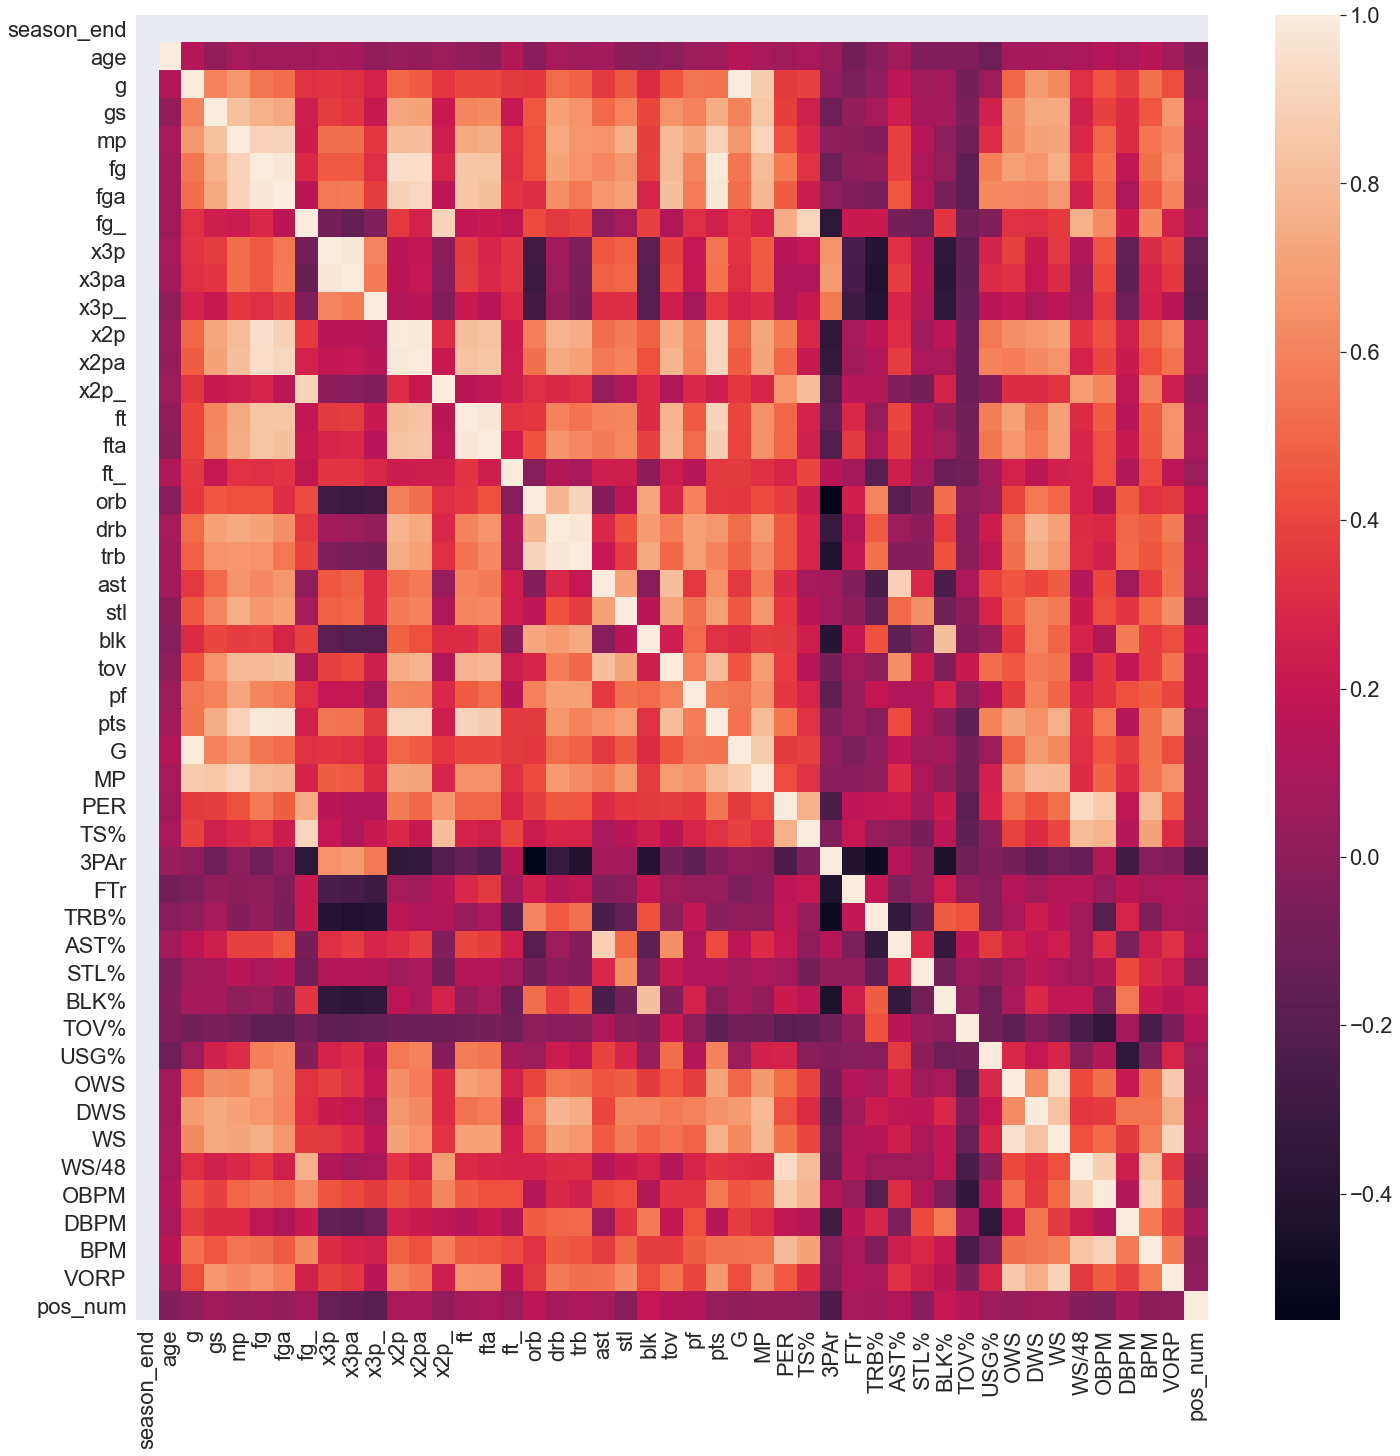

In [573]:
# visualize correlations 
plt.figure(figsize=(24,24))
sns.set(font_scale = 2)
sns.heatmap(nba.corr());

In [574]:
nba.columns

Index(['season_end', 'player', 'pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa', 'x2p_', 'ft', 'fta', 'ft_',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'G', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'pos_num'],
      dtype='object')

fg and fga are correlated//
xp and xp3a//
x2p and x2pa//
drb and trb//

In [575]:
nba.drop(columns=['fga','x3pa','x2pa', 'trb' ])

,season_end,player,pos,age,g,gs,mp,fg,fg_,x3p,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,pos_num
0,2015,Quincy Acy,F,24,52,21,19.2,2.2,0.469,0.2,...,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3,0
1,2015,Jordan Adams,G,20,18,0,7.3,1.0,0.474,0.3,...,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0,1
2,2015,Steven Adams,C,21,51,50,24.2,3.0,0.550,0.0,...,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6,2
3,2015,Jeff Adrien,F,28,17,0,12.6,1.1,0.432,0.0,...,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0,0
4,2015,Arron Afflalo,G,29,60,54,32.5,5.0,0.426,1.5,...,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,2015,James Young,G,19,27,0,10.9,1.1,0.348,0.6,...,15.3,0.1,0.2,0.2,0.040,-1.9,-2.2,-4.1,-0.2,1
474,2015,Nick Young,G,29,42,0,23.8,4.1,0.366,2.0,...,26.0,1.1,0.1,1.2,0.059,1.0,-4.2,-3.2,-0.3,1
475,2015,Thaddeus Young,F,26,58,50,31.8,5.9,0.460,0.5,...,21.3,1.4,1.1,2.4,0.064,0.4,-0.1,0.3,1.1,0
476,2015,Cody Zeller,C,22,61,44,24.1,2.8,0.465,0.0,...,15.6,1.7,2.2,3.9,0.129,-1.9,2.5,0.7,1.0,2


after removing some of the collinear columns


In [576]:
X = nba.iloc[:,3:40]
y = nba['pos']

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [578]:
# build a basic KNN model

# instantiate a model
KNN = KNeighborsClassifier(n_neighbors = 3, weights='distance')
# fit a model
KNN.fit(X_train, y_train)

# make a prediction

pred = KNN.predict(X_test)

In [579]:
sum(pred==y_test)/y_test.count()

0.5208333333333334

In [580]:
## dropping a couple of columns didn't have any impact 

In [581]:
'''use gridsearch to optimize knn hyperparameter; use pipeline to preprocess data i.e. use StandardScaler'''

'use gridsearch to optimize knn hyperparameter; use pipeline to preprocess data i.e. use StandardScaler'

In [582]:
#define the pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

#define the search range for hyperparameters that go into the gridsearch
n_neighbor_range = np.arange(1,100)
weight_range = ['uniform', 'distance']

#setup the grid
param_grid = dict(kneighborsclassifier__n_neighbors = n_neighbor_range, 
                  kneighborsclassifier__weights = weight_range)

#gridsearch

grid = GridSearchCV(pipe, param_grid, scoring = 'accuracy', cv = 5   ) 


# fit 

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [583]:
print(grid.best_score_)
print(grid.best_params_)

0.7405921052631579
{'kneighborsclassifier__n_neighbors': 43, 'kneighborsclassifier__weights': 'distance'}


In [584]:
#iterate over number of columns included in the model and see if the accuracy improves
from itertools import combinations


cols = ['age', 'g', 'gs', 'mp', 'fg', 
        'x3p', 'x2p',  'ft', 
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov']



In [585]:

combination = list(combinations(cols, 13))

In [586]:
output = []
for i in combination:
    X = nba[list(i)]
#     print(X)
    y = nba['pos']
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
    #define the search range for hyperparameters that go into the gridsearch
    n_neighbor_range = np.arange(3,5)
    weight_range = ['uniform', 'distance']
    #setup the dist
    param_dist = dict(kneighborsclassifier__n_neighbors = n_neighbor_range, 
                  kneighborsclassifier__weights = weight_range)
    #gridsearch
    rand = RandomizedSearchCV(pipe, param_grid, scoring = 'accuracy',cv = 5   ) 
    # fit 
    rand.fit(X, y)
    output.append([i, rand.best_params_, rand.best_score_])
    
    


In [587]:
df = pd.DataFrame(output, columns=['i', 'params', 'scores']); 
df.loc[df.scores.idxmax()]


i         (age, g, mp, fg, x2p, ft, orb, drb, trb, ast, ...
params    {'kneighborsclassifier__weights': 'distance', ...
scores                                             0.742632
Name: 75, dtype: object

In [588]:
df.scores.mean()

0.7110177527151212

In [589]:
df.scores.min()

0.6693421052631578

In [590]:
df.loc[63, 'i']

('age',
 'g',
 'gs',
 'fg',
 'x3p',
 'ft',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov')

In [591]:
df.loc[63,'params']

{'kneighborsclassifier__weights': 'distance',
 'kneighborsclassifier__n_neighbors': 41}

In [592]:
df.loc[df.scores.idxmin(), 'params']

{'kneighborsclassifier__weights': 'uniform',
 'kneighborsclassifier__n_neighbors': 24}

KNN=41 is distance weighting is overall the"best" though the average score is 70% with lowest being 67% so really the improvement in the model performance comes from the added features not the tunning. Tunning basically gets you an addition 7% pt improvement


In [605]:
### the best model
X = nba[list(i)]

X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)

#instantiate the model
model = KNeighborsClassifier(n_neighbors = 41, weights = 'distance')

# fit the model to the training dataset

model.fit(X_train, y_train)

# predict with the data

y_pred = model.predict(X_test)


y_pred_proba = model.predict_proba(X_test)


In [606]:
### evaluate the metrics accuracy, recall, f1 and confusion matrix


#accuracy score
print('accuracy score is %s' %metrics.accuracy_score(y_test, y_pred))

#recall
print('weighted recall is %s'%metrics.recall_score(y_test, y_pred, average='weighted'))

#f1
print('f1_score is %s'%metrics.f1_score(y_test, y_pred,average='micro'))

#confusion matrix
# metrics.confusion_matrix(y_test,y_pred)
# print('TN:{} | FP:{} | FN:{} | TP:{}'.format(tn, fp, fn, tp))

accuracy score is 0.65
weighted recall is 0.65
f1_score is 0.65


for a simple KNN model deployed on multilabel classification problem a factor of four over baseline is a pretty good outcome though obviously it can be improved by using other models and more input dimensions
